# THIS NOTEBOOK CONTAINS THE FOLLOWING

1. BUSINESS PROBLEM - CREDIT CARD LEAD PREDICTION
2. HYPOTHESIS GENERATION
3. IMPORTING LIBRARIES
4. EDA

  - a. Brief Look at the dataset
  - b. Dataset Shape
  - c. Target Distribution
  - d. Variable Data types
  - e. Null Value Checks
  - f. Unique Value Checks

5. Univariate and Bivariate Analysis of Categorical Variables
6. Univariate and Bivariate Analysis of Numerical Variables
7. Answering Hypthosis questions.
8. Model Building

  - a. Logistic Regression (Hyper Parameter Tuning)
  - b. Decision Trees (Tuning)
  - c. Random Forest 

9. Comparison of performance of auc_roc_score
10. CONCLUSIONS 

# BUSINESS PROBLEM - CREDIT CARD LEAD PREDICTION

- Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

- The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 

- In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.



Now, the bank wants to identify customers that could show higher intent towards a recommended credit card, given:

DATA DESCRIPTION:

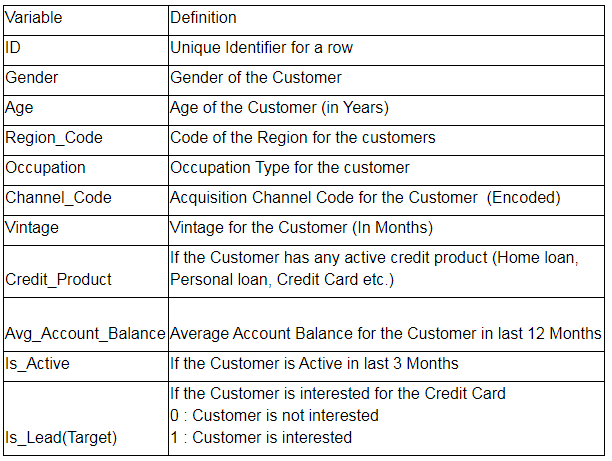

- We can see that variables 2 to 10 can be used for modelling.
- Variable 'ID' is Identifier column. It has a unique value for every sample in the dataset and cannot be used for modelling.
Variable 'Is_Lead' is Target/y column. It has binary values and we need to learn to predict this variable given our above 9 variables as features.

# Hypothesis Generation:

Simply put, a hypothesis is a possible view or assertion of an analyst about the problem he or she is working upon. It may be true or may not be true.

- Are younger customers more interested in Credit Card as compared to old customers ?

- Are people with a higher bank balance more interested in Credit Card than people with low balance ?

- Does Region Code create an impact on the Credit Card interest /Business?

- Does Occupation create an impact on the Credit Card interest /Business?

- Does the channel code used to communicate with the customers tell us anything about their chances of taking Credit Card ? 

- Does Gender create any impact on the chance of taking credit card?

- Does Credit Product create any impact on the chance of taking credit card?

- Does customer being active or inactive make any difference in creating any impact on targeted customer?

- Does Vintage (no of months with bank) will help in creating more interest on customer w.r.t to Credit Card?

In [ ]:
from google.colab import files
files.upload()

!unzip -q av_jobathon_2.zip
!pip install --upgrade seaborn

# IMPORTING LIBRARIES

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings

from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
from tqdm import tqdm
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')
from tqdm import tqdm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
#/content/av_jobathon_2/sample_submission_eyYijxG.csv
os.chdir('/content/av_jobathon_2/')
cwd=os.getcwd()
print("cwd:",cwd)

cwd: /content/av_jobathon_2


# EDA

- Before going to any kind of modelling, we will always want to have a look at the kind of data that we have.

- We have been provided three files. A description for what each of these files contain is given below:

- SampleSubmission.csv: This gives us a required format for submitting our solutions to the AV solution checker.

- Train.csv: We will use this file for training our model. It contains variables or features that we will input to our model, and the target variable that we want to predict.
- Test.csv: This will contain all variables in the training dataset except the target variable. We will use our trained model to predict the target for this dataset.

Now lets go on to read and have a look at each of the files.

In [5]:
ss = pd.read_csv('sample_submission_eyYijxG.csv')
train = pd.read_csv('train_s3TEQDk.csv')
test = pd.read_csv('test_mSzZ8RL.csv')

In [6]:
ss.head(5)

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


- Our sample submission file contains two columns: 'ID' and 'Is_Lead'. We will use the same format to submit to AV. We don't need the ss for now, we will get back to it once we have completed our modelling and predicting phase.

- Lets go and explore our training and test datasets. We will do the following steps:

1. Brief Look at the Dataset
2. See the dataset shape.
3. Target Distribution.
4. See the variables datatypes.
5. See the number of missing/null values.
6. See the number of unique values in each variable.

# 1. Brief look at the dataset.

In [7]:
train.head(3)
test.head(3)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No


In [8]:
ID_COL, TARGET_COL = 'ID', 'Is_Lead'

# 2. Dataset Shape (Number of Samples and Variables in the dataset)

In [9]:
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\nTest contains {test.shape[0]} samples and {test.shape[1]} variables')

features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
print(f'\nThe dataset contains {len(features)} features')


Train contains 245725 samples and 11 variables

Test contains 105312 samples and 10 variables

The dataset contains 9 features


# 3. Target Distribution

This is a binary classification problem. Lets have a look at the number of positive and negative examples that we have, or in our problem statement terms: 'Number of People interested for Credit Card and the number of people who do not show interest'

In [ ]:
train[TARGET_COL].value_counts(normalize=True)

0    0.762792
1    0.237208
Name: Is_Lead, dtype: float64

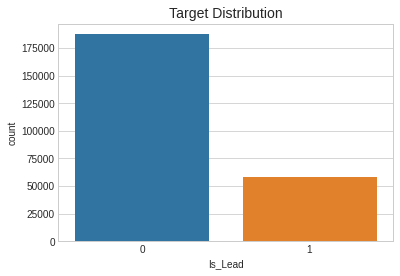

In [ ]:
_ = sns.countplot(train[TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

Quite obviously dataset is very imbalanced. Only about 23.7 % of the examples are positive.

# 4. Variable Datatypes

Lets have a look at the kind of data types that is being used to store the variables in pandas.

pandas info() method on dataframe allows to do that. For each variable we can see the number of non-null values along with their datatypes.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


- Looks like we have a mixture of datatypes, a lot of these variables are object datatypes. Object datatypes are used to store strings along with other non-numeric data. This is obvious since we encountered a lot of strings when we had a look at the dataset.

- Machine Learning Models understand only numbers so we will have to later convert these strings to numbers

# 5. Null Values
Although the info() function did tell us about non-null values ideally we want to have a look at the percentage of null values in each variable.

In [ ]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

Credit_Product         11.9
Is_Lead                0.0 
Is_Active              0.0 
Avg_Account_Balance    0.0 
Vintage                0.0 
Channel_Code           0.0 
Occupation             0.0 
Region_Code            0.0 
Age                    0.0 
Gender                 0.0 
ID                     0.0 
dtype: float64

One feature 'Credit_Product' has null values around 11.9 %, which might mean that these customers did not have any active product with the bank. Well they also could be potential customers for credict card business



# 6. Unique values in each variable

In [ ]:
train.nunique()

ID                     245725
Gender                 2     
Age                    63    
Region_Code            35    
Occupation             4     
Channel_Code           4     
Vintage                66    
Credit_Product         2     
Avg_Account_Balance    135292
Is_Active              2     
Is_Lead                2     
dtype: int64

- The numerical features 'Age','Vintage','Avg_Account_Balance' contain a lot of unique values which is quite obvious.

- Region_Code also has a quite a few no of values which would need good amount of modelling

- The remaining variables look fine.

# Analyzing Each Variable & their relationships

There are two types of features that we have:

1. Categorical
2. Numerical

Also our target is Binary

For each feature type we will be perform two types of analysis:

1. Univariate: Analyze 1 feature at a time

2. Bivariate: Analyze the relationship of that feature with target variable, i.e. 'Is_Lead'

But before jumping straight into analysis, lets have a look at the variables we had and try to ask some questions ourselves

In [11]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

**Segregating Categorical & Numerical Variables**

In [12]:
cat_cols = ['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

In [13]:
num_cols = [c for c in features if c not in cat_cols]
num_cols

['Age', 'Vintage', 'Avg_Account_Balance']

**Categorical Features**

**Univariate Analysis - Pie Charts.**

Pie Charts can be useful in seeing the proportion of samples, that fall into each category of a categorical variable. For each of the categorical variables we will make a pie chart.

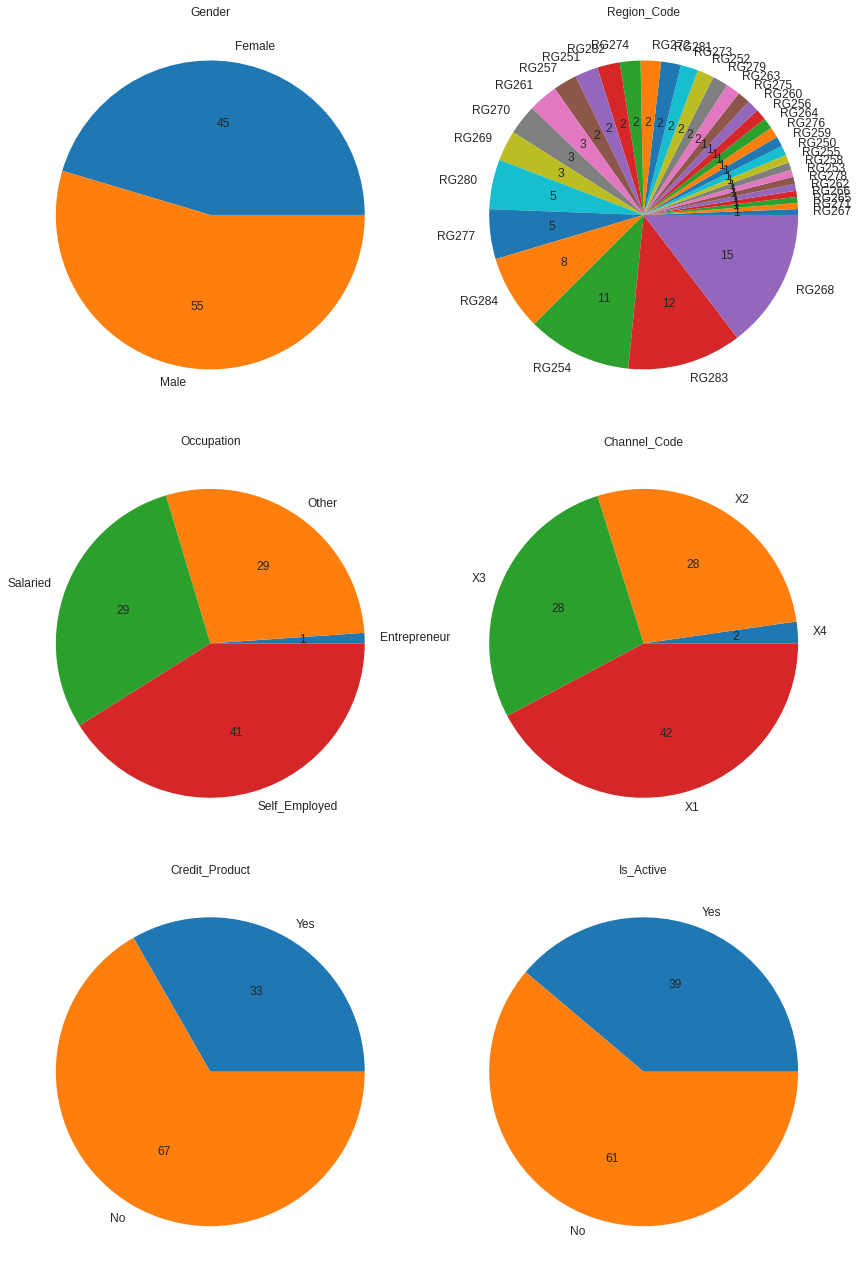

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

# Univariate Analysis - CountPlots

Another way of looking at the counts of each of the categories is countplots. These are similar to barplots with the width of the bars representing the count of the category in the variable

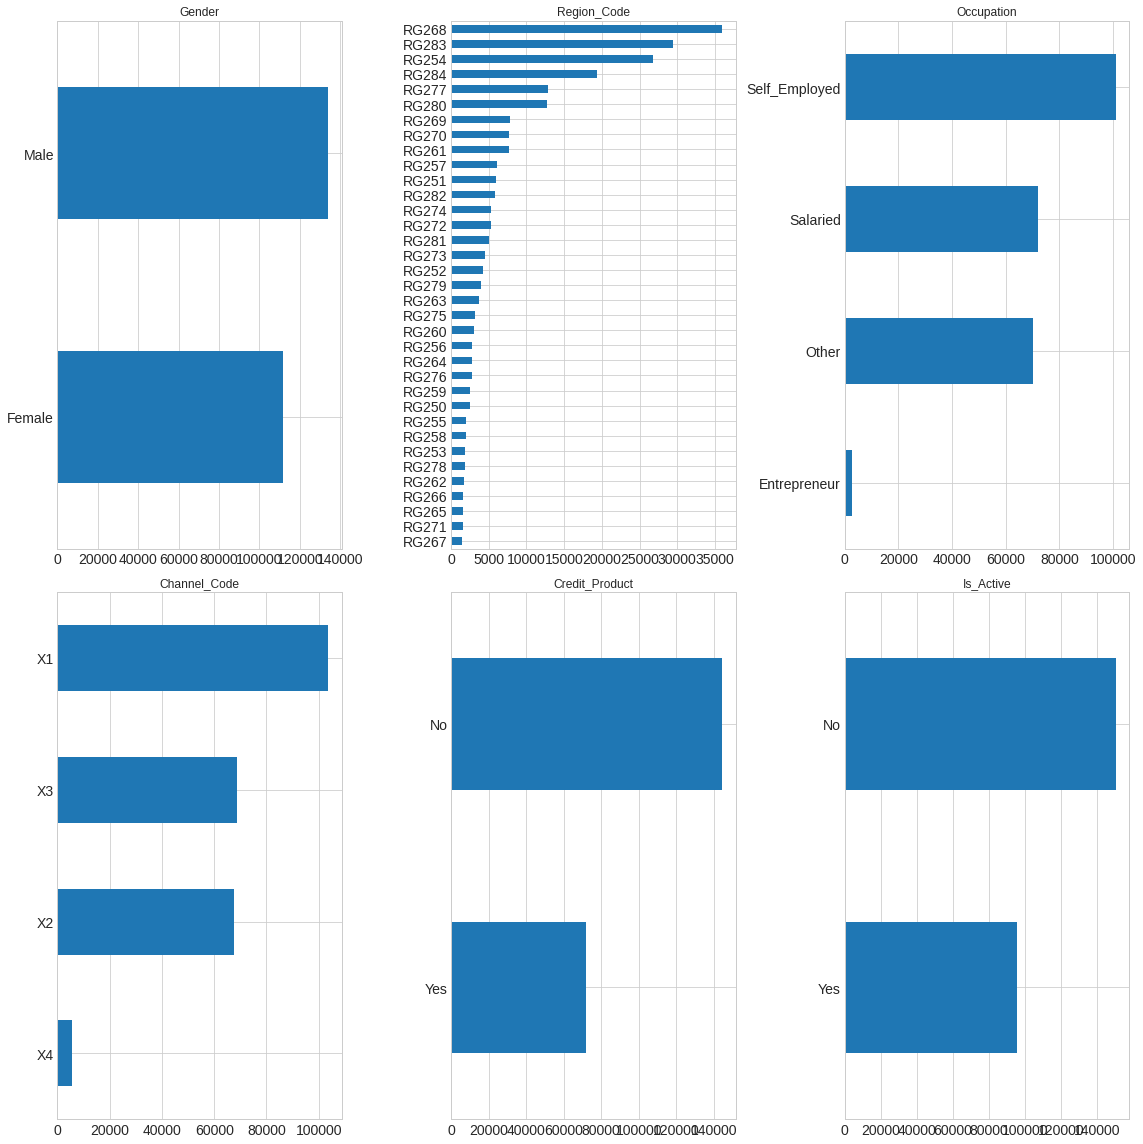

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

**Bivariate Analysis Relationships with Target**

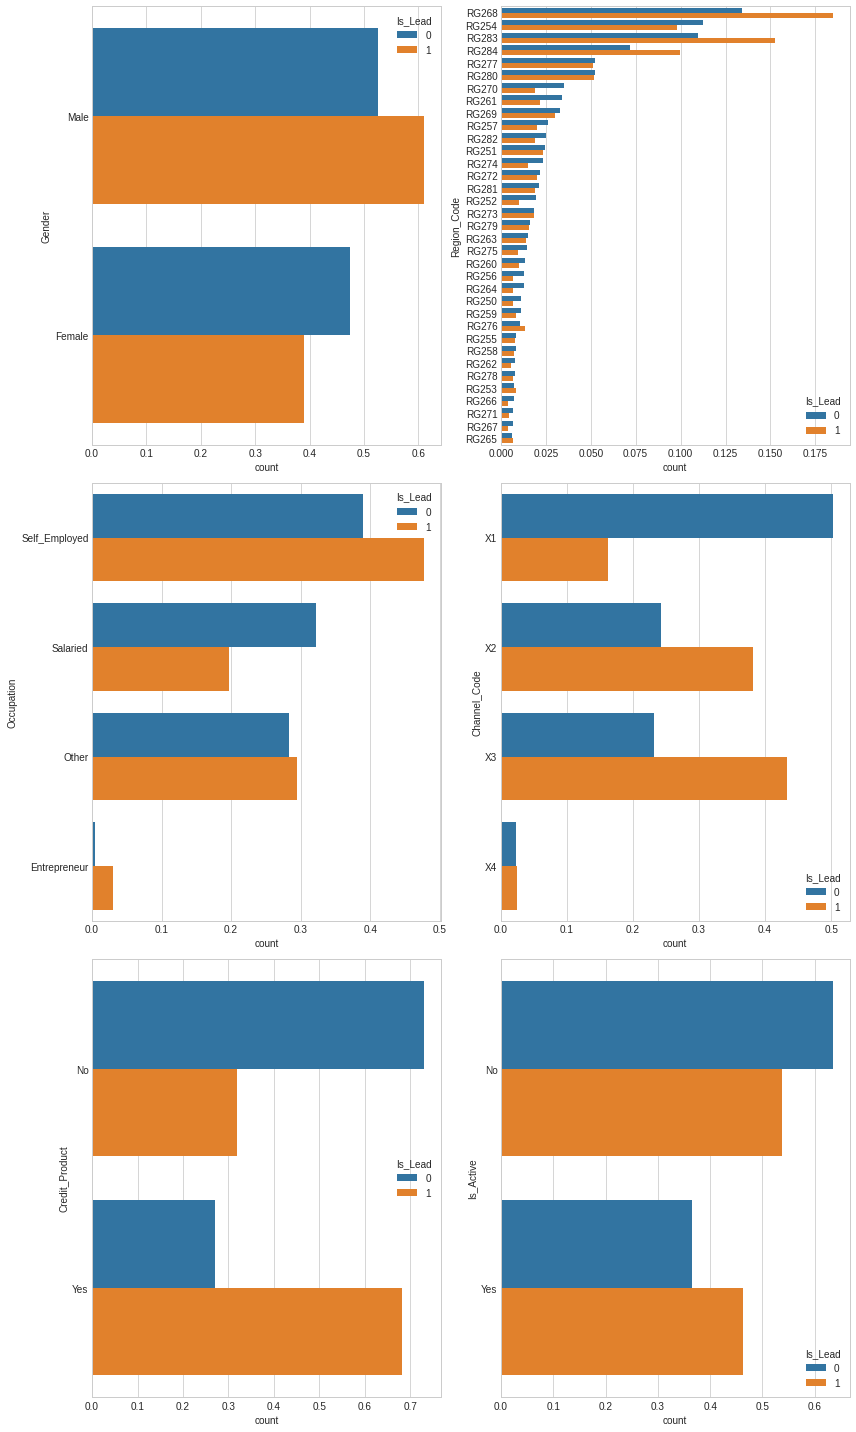

In [14]:

fig, axes = plt.subplots(3, 2, figsize=(12, 20))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    fltr = train[TARGET_COL] == 0
    vc_a = train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_b = train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a[TARGET_COL] = 0
    vc_b[TARGET_COL] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue=TARGET_COL, ax=axes[i])
    
_ = plt.tight_layout()

# Answering Few Hypothesis Questions:
# EDA - CATEGORICAL DATA INFERENCES:

**Q: Does Region Code create an impact on the Credit Card interest /Business?**
-  We see that from the count plot there are about 5 regions (consider them as major cities) which constitute max business for credit card and certainly would be helpful in modeling.

- the bottom 10 regions do not constitute much and can considered as part of minor cities


**Q: Does Occupation create an impact on the Credit Card interest /Business?**

- We see that 'Self Employed', 'Entrepreneur' and 'Other' can create an impact. 'Salaried' set does not create any impact.

**Q: Does the channel code used to communicate with the customers tell us anything about their chances of taking Credit Card ?**

- Yes the Channel Code X2 and X3 does create an impact

**Q: Does Gender create any impact on the chance of taking credit card?**

- It looks like MALE customers are more likely to be interested

**Q: Does Credit Product create any impact on the chance of taking credit card?**

- For Sure Credit Product does create an impact, which means if someone has already taken a loan etc, they will more likely be interested

**Q: Does customer being active or inactive make any difference in creating any impact on targeted customer?**

- For sure, it creates an impact based on the plot we see if the customer is active from past 3 months then we can definitely target them

# A Few more Inferences we could make are:

**Q. Do Entrepreneur have more chances of taking credit card?**

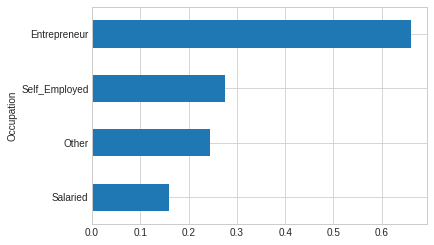

In [19]:
_ = train.groupby('Occupation')[TARGET_COL].mean().sort_values().plot(kind = 'barh')

For Sure, it looks like Entrepreneurs show a lot of interest

# Numerical Features

1. Univariate Analysis - Boxplots
Boxplot can be used to see the spread of the numerical variables, and identify outliers

https://en.wikipedia.org/wiki/Box_plot

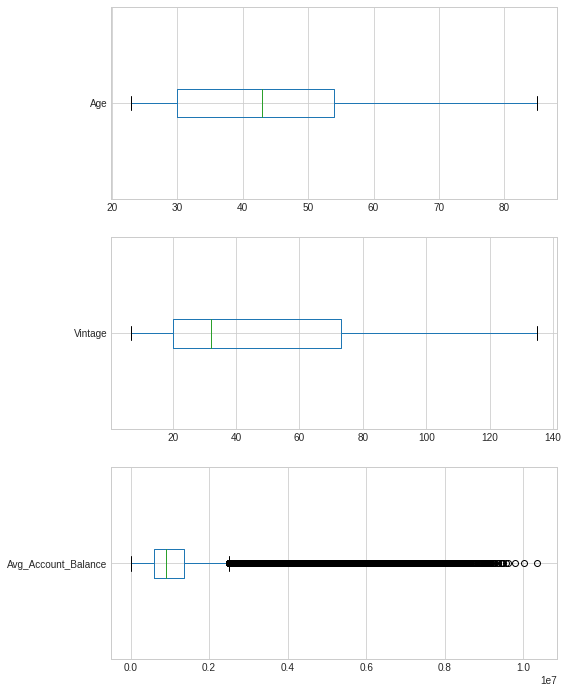

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
for i, c in enumerate(['Age', 'Vintage', 'Avg_Account_Balance']):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

# 2. Univariate Analysis - Density Plots
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

https://seaborn.pydata.org/generated/seaborn.kdeplot.html

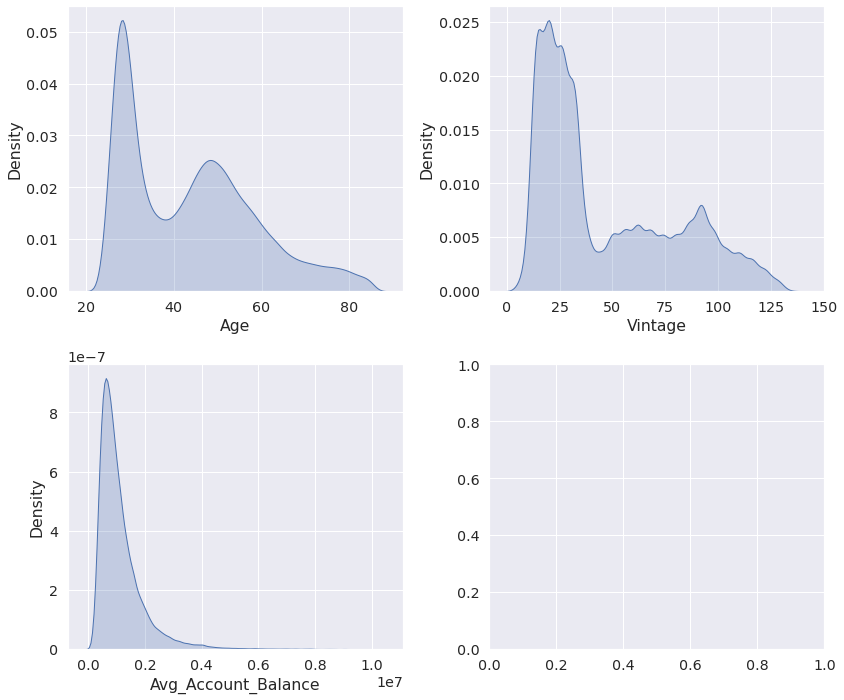

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(['Age', 'Vintage', 'Avg_Account_Balance']):
  plot = sns.kdeplot(data=train, x=c, ax=axes[i], fill=True)
plt.tight_layout()

Lets Take the Log of the values to see more clearly

In [ ]:
train['log_Age'] = np.log1p(train['Age']) 
train['log_Vintage'] = np.log1p(train['Vintage']) 
train['log_Avg_Account_Balance'] = np.log1p(train['Avg_Account_Balance']) 

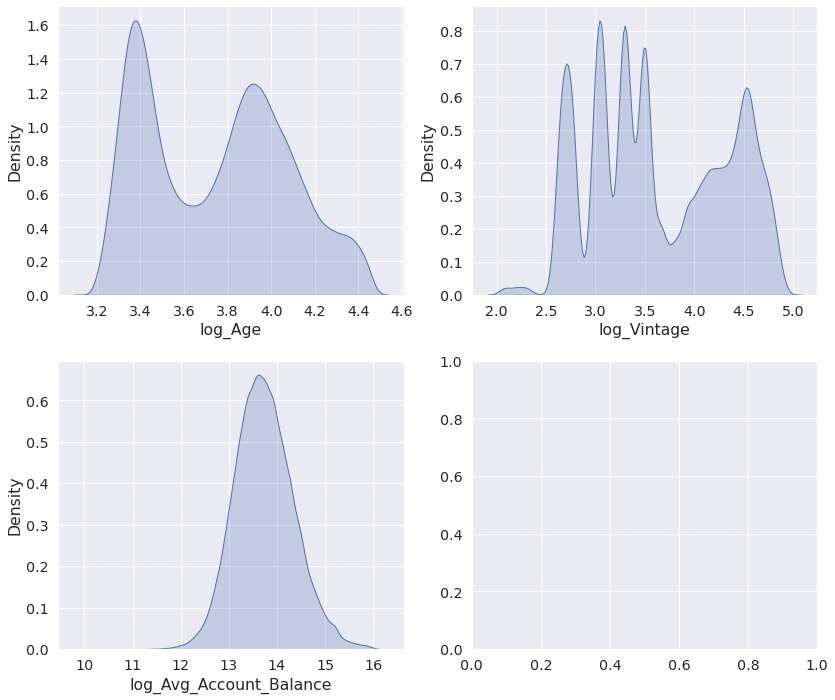

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(['log_Age', 'log_Vintage', 'log_Avg_Account_Balance']):
  plot = sns.kdeplot(data=train, x=c, ax=axes[i], fill=True)
plt.tight_layout()

**Lets see the 25, 50, 75, 90, 95 and 100th percentile**

In [ ]:
print("25th percentile of total_representative_visits",np.percentile(train[['Age']], 25))
print("50th percentile of total_representative_visits",np.percentile(train[['Age']], 50))
print("75th percentile of total_representative_visits",np.percentile(train[['Age']], 75))
print("90th percentile of total_representative_visits",np.percentile(train[['Age']], 90))
print("95th percentile of total_representative_visits",np.percentile(train[['Age']], 95))
print("100th percentile of total_representative_visits",np.percentile(train[['Age']], 100))

25th percentile of total_representative_visits 30.0
50th percentile of total_representative_visits 43.0
75th percentile of total_representative_visits 54.0
90th percentile of total_representative_visits 64.0
95th percentile of total_representative_visits 73.0
100th percentile of total_representative_visits 85.0


In [ ]:
print("25th percentile of total_representative_visits",np.percentile(train[['Vintage']], 25))
print("50th percentile of total_representative_visits",np.percentile(train[['Vintage']], 50))
print("75th percentile of total_representative_visits",np.percentile(train[['Vintage']], 75))
print("90th percentile of total_representative_visits",np.percentile(train[['Vintage']], 90))
print("95th percentile of total_representative_visits",np.percentile(train[['Vintage']], 95))
print("100th percentile of total_representative_visits",np.percentile(train[['Vintage']], 100))

25th percentile of total_representative_visits 20.0
50th percentile of total_representative_visits 32.0
75th percentile of total_representative_visits 73.0
90th percentile of total_representative_visits 98.0
95th percentile of total_representative_visits 110.0
100th percentile of total_representative_visits 135.0


In [ ]:
print("25th percentile of total_representative_visits",np.percentile(train[['Avg_Account_Balance']], 25))
print("50th percentile of total_representative_visits",np.percentile(train[['Avg_Account_Balance']], 50))
print("75th percentile of total_representative_visits",np.percentile(train[['Avg_Account_Balance']], 75))
print("90th percentile of total_representative_visits",np.percentile(train[['Avg_Account_Balance']], 90))
print("95th percentile of total_representative_visits",np.percentile(train[['Avg_Account_Balance']], 95))
print("100th percentile of total_representative_visits",np.percentile(train[['Avg_Account_Balance']], 100))

25th percentile of total_representative_visits 604310.0
50th percentile of total_representative_visits 894601.0
75th percentile of total_representative_visits 1366666.0
90th percentile of total_representative_visits 2043591.0
95th percentile of total_representative_visits 2673533.0
100th percentile of total_representative_visits 10352009.0


From the above we could make inferences that there are no outliers in data set except for Avg_Account_Balance which is understood

# 3. Bivariate Analysis KDE plots - Relationships with Target Variable.

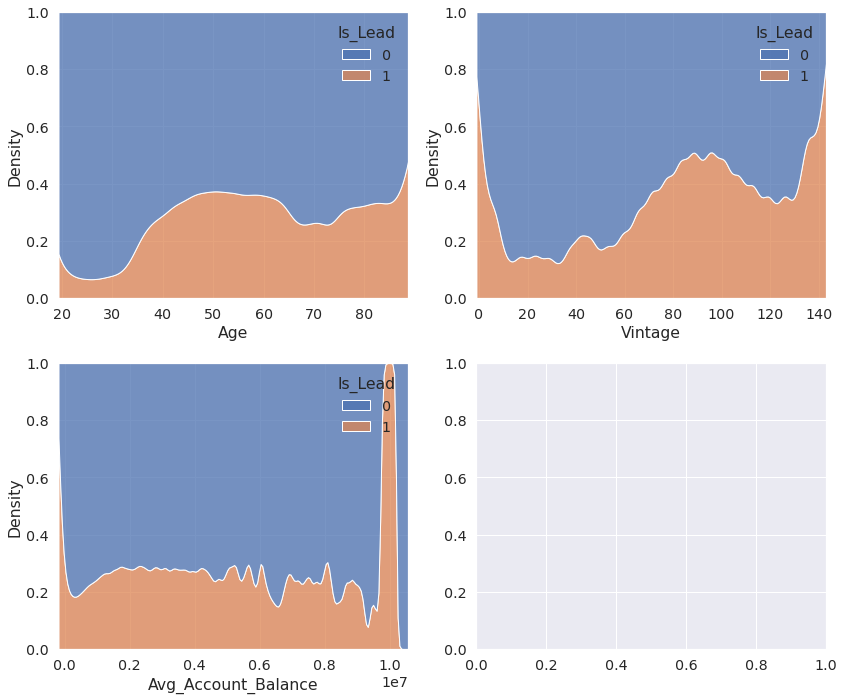

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(['Age', 'Vintage', 'Avg_Account_Balance']):
  plot = sns.kdeplot(data=train, x=c, ax=axes[i], hue=TARGET_COL, multiple='fill')
plt.tight_layout()

# 4. Bivariate Analysis - Horizontal BarPlots

For each numerical Variable. We will plot the median of the numerical variable for:

- When Is_Lead == 0
- When Is_Lead == 1

We are choosing median since median is not affected by outliers, and our data has a lot of outlers

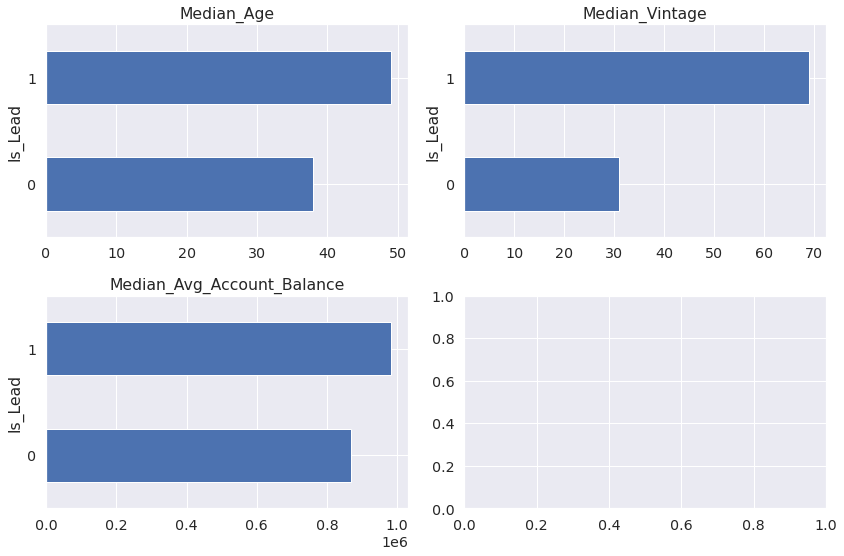

In [25]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(['Age', 'Vintage', 'Avg_Account_Balance']):
  plot = train.groupby(TARGET_COL)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])
plt.tight_layout()

# EDA - NUMERICAL FEATURES INFERENCES

**Q: Are people with a higher bank balance more interested in Credit Card than people with low balance ?**

- It does not look like the Avg Account balance would make any impact, but if the account balance is more then it is highly like to be interested.

**Q: Does Vintage (no of months with bank) will help in creating more interest on customer w.r.t to Credit Card?**

- For Sure Median of Vintage customers who are interested is more, so customers who are with this bank for long time would be more interested.

**Q: Are younger customers more interested in Credit Card as compared to old customers ?**

- Yes, it looks like the median age for customers who are interested is more than young customers

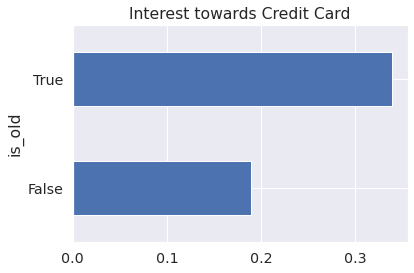

In [27]:
train['is_old'] = True
train.loc[train['Age'] <= 50, 'is_old'] = False

_ = train.groupby('is_old')[TARGET_COL].mean().sort_values().plot(kind = 'barh', title='Interest towards Credit Card')

In [41]:
train.drop(['is_old'], axis = 1,inplace = True) 

<Figure size 720x432 with 0 Axes>

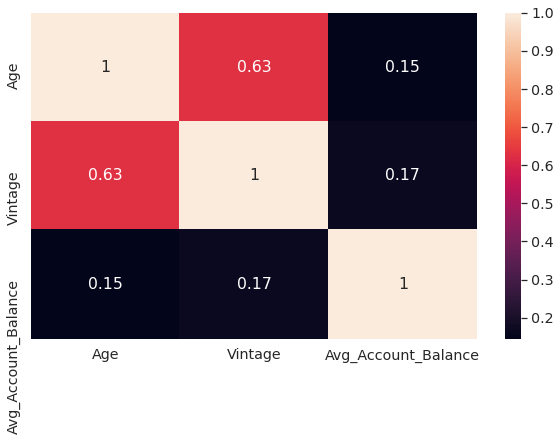

In [44]:
plt.figure(figsize=(10, 6))
_ = sns.heatmap(train[num_cols].corr(), annot=True)

In [30]:
# Reference: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
columns_to_analyze = ['Age','Vintage','Avg_Account_Balance']
df_to_analyze = train[columns_to_analyze]
vif_to_analyze = pd.DataFrame()
vif_to_analyze["VIF_FACTOR"] = [variance_inflation_factor(df_to_analyze.iloc[:,:].values, i) for i in range(df_to_analyze.shape[1])]
vif_to_analyze["FEATURES"] = df_to_analyze.columns
vif_to_analyze

,VIF_FACTOR,FEATURES
0,6.386088,Age
1,5.027854,Vintage
2,2.598217,Avg_Account_Balance


In [32]:
def download_preds(preds_test, file_name = 'hacklive_sub.csv'):

  ## 1. Setting the target column with our obtained predictions
  ss[TARGET_COL] = preds_test

  ## 2. Saving our predictions to a csv file

  ss.to_csv(file_name, index = False)

  ## 3. Downloading and submitting the csv file
  from google.colab import files
  files.download(file_name)

# MODEL BUILDING

In [43]:
ID_COL, TARGET_COL = 'ID', 'Is_Lead'
features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]

cat_cols = ['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

num_cols = [c for c in features if c not in cat_cols]

In [35]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'is_old'],
      dtype='object')

In [36]:
cat_cols

['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

In [45]:
num_cols

['Age', 'Vintage', 'Avg_Account_Balance']

In [46]:
train.shape, test.shape

((245725, 11), (105312, 10))

In [51]:
del df

In [52]:
df = pd.concat([train, test], axis=0).reset_index(drop = True)
df.shape

(351037, 11)

In [ ]:
df

In [54]:
cat_cols = ['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

**Segregating / Identifying Null values using a new column**

In [55]:
def func1(r):
  return 0

def func2(r):
  return 1

In [56]:
df['Missing_Credit_Product'] = df.apply(lambda row: func1(row) if row.notnull().all() else func2(row),axis=1)

FILLING Missing Values with 'UNK'

In [57]:
df[['Credit_Product']] = df[['Credit_Product']].fillna('UNK')

# FEATURE ENGG BASED ON INFERENCES FROM EDA

- have identified few cities which can be considered as major cities
- have identified few channels which are important for Lead Prediction
- Found relationship between Is_Active and Credit_Product
- Added new variables like Salaried, and Entrepreneus identifier columns
- Added new variables to identify older customers and vintage customers


In [59]:
def func_Region_Code_Major(row):
    if (row['Region_Code']=='RG268'):
        val='MAJOR_CITY'  
    elif (row['Region_Code']=='RG254'):   
        val='MAJOR_CITY'  
    elif (row['Region_Code']=='RG283'):   
        val='MAJOR_CITY'      
    elif (row['Region_Code']=='RG284'):   
        val='MAJOR_CITY'  
    elif (row['Region_Code']=='RG277'):   
        val='MAJOR_CITY'  
    elif (row['Region_Code']=='RG280'):   
        val='MAJOR_CITY'                                                                                                                                                                            
    else:
        val='MINOR_CITY'
    return val

In [61]:
df['Region_Code_Major_Minor']=df.apply(func_Region_Code_Major,axis=1) 

In [62]:
def func_Channel_Code_Major(row):
    if (row['Channel_Code']=='X2'):
        val='MAJOR_CHANNEL'  
    elif (row['Channel_Code']=='X3'):   
        val='MAJOR_CHANNEL'                                                                                                                                                                          
    else:
        val='MINOR_CHANNEL'
    return val

In [63]:
df['Channel_Code_Major_Minor']=df.apply(func_Channel_Code_Major,axis=1) 

In [64]:
def func_Is_Active_Credit_Product(row):
    if ((row['Is_Active']=='Yes') and (row['Credit_Product']=='Yes')):
        val='ACTIVE_CREDIT_PRODUCT'                                                                                                                                                                         
    else:
        val='INACTIVE_CREDIT_PRODUCT'
    return val

In [65]:
df['Is_Active_Credit_Product']=df.apply(func_Is_Active_Credit_Product,axis=1) 

In [67]:
def func_Occupation(row):
    if ((row['Occupation']=='Salaried')):
        val=1                                                                                                                                                                       
    else:
        val=0
    return val

In [68]:
df['Salaried']=df.apply(func_Occupation,axis=1) 

In [69]:
def func_Occupation2(row):
    if ((row['Occupation']=='Entrepreneur')):
        val=1                                                                                                                                                                       
    else:
        val=0
    return val

In [70]:
df['Entrepreneur']=df.apply(func_Occupation2,axis=1) 

In [71]:
def func_Age(row):
    if ((row['Age']>=50)):
        val=1                                                                                                                                                                       
    else:
        val=0
    return val

In [72]:
df['Is_old']=df.apply(func_Age,axis=1) 

In [73]:
def func_Vintage(row):
    if ((row['Vintage']>=60)):
        val=1                                                                                                                                                                       
    else:
        val=0
    return val

In [74]:
df['Is_Vintage_old']=df.apply(func_Vintage,axis=1) 

In [78]:
cat_cols=['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active','Region_Code_Major_Minor','Channel_Code_Major_Minor','Is_Active_Credit_Product']

In [79]:
num_cols=['Age','Vintage','Avg_Account_Balance','Missing_Credit_Product','Salaried','Entrepreneur','Is_old','Is_Vintage_old']

In [80]:
df = pd.get_dummies(df, columns = cat_cols)

In [82]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop = True)
features = [c for c in train_proc.columns if c not in [ID_COL, TARGET_COL]]

In [84]:
len(features)

64

# TRAIN TEST STRATIFIED SPLITTING

In [85]:
trn, val = train_test_split(train_proc, test_size=0.2, random_state = 1, stratify = train_proc[TARGET_COL])

###### Input to our model will be the features
X_trn, X_val = trn[features], val[features]

###### Output of our model will be the TARGET_COL
y_trn, y_val = trn[TARGET_COL], val[TARGET_COL]

##### Features for the test data that we will be predicting
X_test = test_proc[features]

# PRE-PROCESSING

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_ = scaler.fit(X_trn)

X_trn = scaler.transform(X_trn)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# LOGISTIC REGRESSION (with Hyper Parameter Tuning)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'solver': ['liblinear', 'lbfgs','newton-cg'],
    'penalty': ['l2'],
    'C': [100, 10, 1.0, 0.1, 0.01]
}

clf = RandomizedSearchCV(LogisticRegression(),
                         hyperparam_combs,
                         scoring='roc_auc',
                         random_state=1,
                         n_iter=20,n_jobs=-1)

search = clf.fit(X_trn, y_trn)

search.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [89]:
#{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
clf = LogisticRegression(random_state = 1,C=0.01,penalty='l2',solver='liblinear')
_ = clf.fit(X_trn, y_trn)

preds_val = clf.predict(X_val)

roc_auc_score(y_val, preds_val)

0.7504599627361869

# DECISION TREE (with Hyper Parameter Tuning)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

clf = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                         scoring='roc_auc',
                         random_state=1,
                         n_iter=20,n_jobs=-1)

search = clf.fit(X_trn, y_trn)

search.best_params_

{'class_weight': {0: 1, 1: 3},
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'max_leaf_nodes': 32,
 'min_samples_split': 20}

In [90]:
optimal_params = {'class_weight': {0: 1, 1: 3},
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'max_leaf_nodes': 32,
 'min_samples_split': 20}

clf = DecisionTreeClassifier(random_state = 1, **optimal_params)
_ = clf.fit(X_trn, y_trn)

preds_val = clf.predict(X_val)

roc_auc_score(y_val, preds_val)

0.8013846195336622

In [ ]:
preds_test = clf.predict(X_test)

download_preds(preds_test, file_name = 'hacklive_dt.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# RANDOM FOREST (with Hyper Parameter Tuning)

In [141]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'n_estimators':[100,200,500,1000,2000,3000],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

clf = RandomizedSearchCV(RandomForestClassifier(),
                         hyperparam_combs,
                         scoring='roc_auc',
                         random_state=1,
                         n_iter=5,n_jobs=-1,verbose=10)

search = clf.fit(X_trn, y_trn)

search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 56.4min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 58.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 58.9min finished


{'class_weight': {0: 1, 1: 5},
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 0.4,
 'max_leaf_nodes': 64,
 'min_samples_split': 30,
 'n_estimators': 1000}

In [143]:
optimal_params = {'class_weight': {0: 1, 1: 5}, 'n_estimators':1000,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 0.4,
 'max_leaf_nodes': 64,
 'min_samples_split': 30}

clf = RandomForestClassifier(random_state = 1, **optimal_params)
_ = clf.fit(X_trn, y_trn)

preds_val = clf.predict(X_val)

roc_auc_score(y_val, preds_val)

0.7971307047448434

In [144]:
preds_test = clf.predict_proba(X_test)

download_preds(preds_test, file_name = 'hacklive_RF.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# IMPLEMENTING STRATIFIED KFOLDS

In [97]:
def run_clf_kfold(clf, train, test, features):

  N_SPLITS = 5

  oofs = np.zeros(len(train))
  preds = np.zeros((len(test)))

  folds = StratifiedKFold(n_splits = N_SPLITS)

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[TARGET_COL])):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    ############# Scaling Data ################
    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)


    ############# Fitting and Predicting ################

    _ = clf.fit(X_trn, y_trn)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict_proba(X_val)[:, 1]
    preds_test = clf.predict_proba(X_test)[:, 1]

    fold_score = roc_auc_score(y_val, preds_val.round())
    print(f'\nroc_auc_score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = roc_auc_score(target, oofs.round())
  print(f'\n\nroc_auc_score for oofs is {oofs_score}')

  return oofs, preds

In [96]:
target = train[TARGET_COL]

In [98]:
dt_params = {'class_weight': {0: 1, 1: 3},
             'criterion': 'gini',
             'max_depth': 10,
             'max_features': 0.8,
             'max_leaf_nodes': 32,
             'min_samples_split': 20,
             'random_state': 1
             }

clf = DecisionTreeClassifier(**dt_params)
        

dt_oofs, dt_preds = run_clf_kfold(clf, train_proc, test_proc, features)


------------- Fold 1 -------------

roc_auc_score for validation set is 0.8030197045743152

------------- Fold 2 -------------

roc_auc_score for validation set is 0.8035250059579272

------------- Fold 3 -------------

roc_auc_score for validation set is 0.801722152911677

------------- Fold 4 -------------

roc_auc_score for validation set is 0.8020206906702209

------------- Fold 5 -------------

roc_auc_score for validation set is 0.8063378000090183


roc_auc_score for oofs is 0.8033251091114899


In [100]:
len(dt_preds)

105312

In [101]:
#dt_preds_rounded = dt_preds.round()
download_preds(dt_preds, file_name = 'hacklive_dt_5_folds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# COMPARISON OF ALL MODELS

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Eval Metric","SCORE"]
x.add_row(["-------------------------","------------------","----"])
x.add_row(["Logistic Regr","ROC AUC SCORE",0.75])
x.add_row(["Decision Tree","ROC AUC SCORE",0.80])
x.add_row(["Random Forest","ROC AUC SCORE",0.79])
x.add_row(["-------------------------","------------------","----"])

print(x)

# FINAL CONCLUSION

- From the above mentioned summary we can state that Tree models do well instead of linear model
- Decision Tree Classifier is the Winner here.